<a href="https://colab.research.google.com/github/Tallivm/data_mining_notebooks/blob/main/Model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# all imports in one place

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-validation

A technique used to ensure that we will get similar results with most of data split and random seed variants.

In [2]:
# load the data
digits = datasets.load_digits()
# prepare features and target vectors
features = digits.data
target = digits.target

# Create standardizer
standardizer = StandardScaler()
# Create model object
logit = LogisticRegression()
# Create a pipeline that standardizes the data, then runs selected model
pipeline = make_pipeline(standardizer, logit)

## What is KFold?

The data is splitted into **k** folds (parts), and **k-1** folds are chosen as a train set, whereas the last fold goes as a test set. The training will be repeated **k** times for each fold as a test set.


If you're doing classification and your data is imbalanced, it is better to use `StratifiedKFold`, as it not only splits to **k** folds, but makes it so that folds would have the same distribution of classes.

In [3]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [4]:
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline,            # Pipeline
                             features,            # Feature matrix
                             target,              # Target vector
                             cv=kf,               # Cross-validation technique
                             scoring="accuracy",  # Loss function
                             n_jobs=-1)           # Use all CPU scores

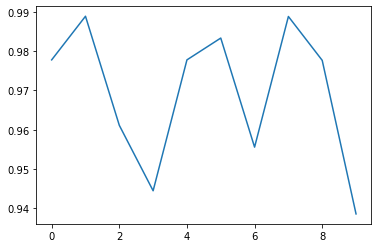

In [5]:
plt.plot(cv_results);

# Baseline Models

Dummy models predict the same number for every target. This works as a simulation of "naive" predictions.

## Dummy for Regression

In [6]:
# Load data
boston = datasets.load_boston()
features, target = boston.data, boston.target
# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
# Create and "train" a dummy regressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train, target_train)
# Get R-squared score
dummy_score = dummy.score(features_test, target_test)

# Train (for example) simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)
# Get R-squared score
ols_score = ols.score(features_test, target_test)

# Compare scores
print(f'Baseline R-squared: {dummy_score}\nOLS R-squared: {ols_score}')

Baseline R-squared: -0.001119359203955339
OLS R-squared: 0.635463843320211


## Dummy for Classification

In [7]:
# Load data
iris = datasets.load_iris()
features, target = iris.data, iris.target
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
# Create and "train" a dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1) # for unbalanced data, try: strategy='stratified'
dummy.fit(features_train, target_train)

# Get accuracy score
dummy_score = dummy.score(features_test, target_test)

# Create and train a chosen classifier
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
# Get accuracy score
class_score = classifier.score(features_test, target_test)

# Compare scores
print(f'Baseline accuracy: {dummy_score}\nRandomForest accuracy: {class_score}')

Baseline accuracy: 0.42105263157894735
RandomForest accuracy: 0.9736842105263158


# Scores to evaluate classification

Accuracy, precision, recall, F1



In [8]:

# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,     # number of samples
                           n_features = 5,        # number of features
                           n_informative = 3,     # number of informative features
                           n_redundant = 0,       # number of redundant features
                           n_classes = 2,         # number of classes
                           random_state = 1,  
                           weights=(.1, .9))      # distribution of classes (the last weight can be ommited)

# Create logistic regression
logit = LogisticRegression()

print('Accuracy:')
print('Proportion of observations predicted correctly')
print(cross_val_score(logit, X, y, scoring="accuracy"))
print('-'*20)
print('Precision:')
print('Proportion of every observation predicted to be positive that is actually positive')
print(cross_val_score(logit, X, y, scoring="precision"))
print('-'*20)
print('Recall:')
print('Proportion of every positive observation that is truly positive')
print(cross_val_score(logit, X, y, scoring="recall"))
print('-'*20)
print('F1:')
print('The harmonic mean of precision and recall')
print('Macro:', cross_val_score(logit, X, y, scoring="f1_macro"))
print('Micro:', cross_val_score(logit, X, y, scoring="f1_micro"))
print('Weighted:', cross_val_score(logit, X, y, scoring="f1_weighted"))

Accuracy:
Proportion of observations predicted correctly
[0.9715 0.967  0.968  0.9665 0.9705]
--------------------
Precision:
Proportion of every observation predicted to be positive that is actually positive
[0.97480832 0.97468354 0.97945586 0.97205479 0.97476687]
--------------------
Recall:
Proportion of every positive observation that is truly positive
[0.99385818 0.98883305 0.98492462 0.99106145 0.99273743]
--------------------
F1:
The harmonic mean of precision and recall
Macro: [0.91770801 0.90666999 0.91265994 0.90372007 0.91560765]
Micro: [0.9715 0.967  0.968  0.9665 0.9705]
Weighted: [0.97033567 0.96602451 0.96765239 0.96513944 0.96937697]


F1:

**macro**
Calculate mean of metric scores for each class,
weighting each class equally.

**micro**
Calculate mean of metric scores for each observation-
class combination.

**weighted**
Calculate mean of metric scores for each class,
weighting each class proportional to its size in the data.


Precision and recall can be used in **multiclass classification.** In this way, we don't have Negatives at all, we only have True Positives and False Positives. 
Precision is calculated as the sum of true positives across all classes divided by the sum of true positives and false positives across all classes.
Recall is calculated as the sum of true positives across all classes divided by the sum of true positives and false negatives across all classes.

More on that: https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

# ROC

Works only for binary classification. Calculates True Positive Rate (TPR, ) and False Positive Rate (FPR).

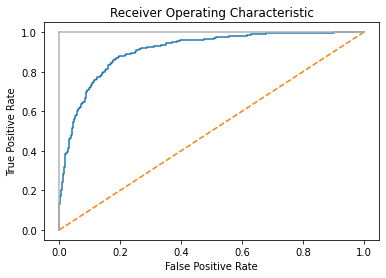

In [9]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# create and train a model
logit = LogisticRegression()
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")                                     # AUC = 0.5
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")  # AUC = 1.0
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


Any point on the orange line corresponds to a situation where TPR is equal to FPR. The bigger $\frac{TPR}{FPR}$, the better. Then, the farrest blue point from the orange line should be the best threshold.

What is a **threshold**? If we have a threshold $a$ and predicted probability $p$, then if $p=<a$, the predicted class is 0, and if $p>a$, the predicted class is 1.  

We can choose the threshold we need for TPR and FPR rates best suited for our needs. ROC curve does not consist of all samples; only some subset is chosen so the curve would be lighter. In this example, we had 1000 test samples, but only 236 predictions going out from the `roc_curve` function.

More on that: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [10]:

N=len(true_positive_rate)//2

print("Threshold:", threshold[N])
print("True Positive Rate:", true_positive_rate[N])
print("False Positive Rate:", false_positive_rate[N])

Threshold: 0.5211271935759425
True Positive Rate: 0.8142857142857143
False Positive Rate: 0.15490196078431373


# Confusion matrix

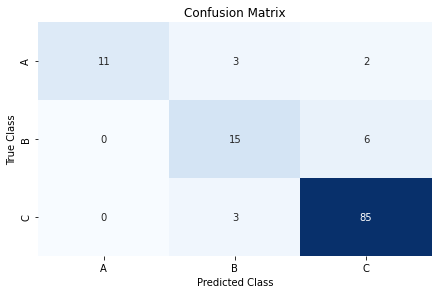

In [11]:
# create synthetic data
X, y = make_classification(n_samples = 500,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 3,
                           random_state = 1,
                           weights=(.1, .2))
class_names = ['A','B','C']

features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=1)

# create and train a model
classifier = LogisticRegression()
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# plotting:
# Create pandas dataframe for the heatmap
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()